# Lab 1 - Statistical Distributions

This lab will focus on statistical distributions including both continuous and non-continuous distributions. We will also cover the use and conversion of probabilities to 'sigma'.

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## A Little Statistics

## 1.

**Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.**

## A)

**Look up the Normal distribution and read about it. A few potential starting points: Math is fun, Wolfram, and a useful z table**

We have read about the normal distribution about a point and corresponding z table values.

## B)

**As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to specific statistical cumulative probability distributions such as stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values that match the z-table.**

We now move on to checking that we can easily calculate the integral under the distribution by using the error function, which in this case is called by using stats.norm.cdf(x) where x is the value of sigma (standard deviations) away from the center of the distribution.

In [2]:
stats.norm.cdf(0)

0.5

We check the values with the z scores in the Standard Normal table (https://en.wikipedia.org/wiki/Standard_normal_table):

	0.50000

In [3]:
stats.norm.cdf(0.1)

0.539827837277029

	0.53983

In [4]:
stats.norm.cdf(-0.1)

0.460172162722971

	0.46017

In [5]:
stats.norm.cdf(0.5)

0.6914624612740131

	0.69146

In [6]:
stats.norm.cdf(-0.5)

0.3085375387259869

	0.30854

In [28]:
stats.norm.cdf(2)

0.9772498680518208

	0.97725

In [29]:
stats.norm.cdf(-2)

0.022750131948179195

	0.02275

These values all seem to match the z scores from the Standard Normal table.

## C)

**Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: stats.norm.ppf() in python. Try several probability values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.**

Here, we check that the inverse of the integral of the normal distribution.
Keep in mind the symmetric sigma along both wings of the distribution.

5 sigma = 2.87e-7 (for e.g. probability of signal being produced from background noise) - otherwise 5 sigma = 1-(2.87e-7)

In [9]:
stats.norm.ppf(2.87e-7)

-4.999765776842555

1 sigma = .84

In [31]:
stats.norm.cdf(1)

0.8413447460685429

In [10]:
stats.norm.ppf(.16)

-0.994457883209753

In [11]:
stats.norm.ppf(0.023)

-1.9953933101678247

In [12]:
stats.norm.ppf(.977)

1.9953933101678245

## D)

**If a minus sign appears, think about it and explain the meaning.**

The minus sign, demonstrated above when inputting e.g. probabilities 0.977 and 0.023=1-0.977, arrives from how the number of sigmas we are away from the center of the normal distribution. Since there is a 50% chance of having a higher value than the center of the distribution and 50% chance of being lower than the distribution, the center of the distribution is situated at 0 sigma. Any measured value to the right of the center would thus be a positive number of sigmas away from the center of the distribution, and naturally if the measured value is to the left of the central distribution, it would be a negative number of sigmas away from the center of the distribution. Thus, the value of sigmas are thus symmetric about the distribution's midpoint but with opposite signs depending on whether or not the measured value is to the left or right of the center.

## 2.

**Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.**

## A)

**Read up on your distribution**

I have read about the LogNormal distribution and will focus on this specific distribution for the following task.

## B)

**Make plots (tweaking distribution and plot parameters as needed)**

Producing a LogNormal distribution using scipy

In [13]:
s = 1
d = stats.lognorm.rvs(s, size = 100000)

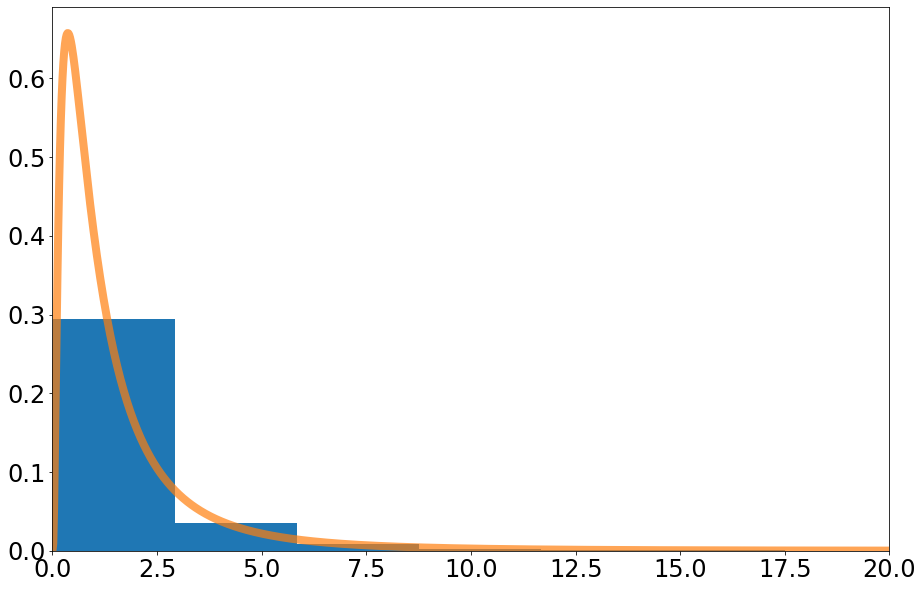

In [14]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,20])
x = np.linspace(0,20,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

As we can see by comparing the plots above and below, changing the s parameter in the LogNormal distribution. This changes the "shape parameter" of the distribution.
Note the change in the limits of x in the axes on the plot below.

In [15]:
s = .5
d = stats.lognorm.rvs(s, size = 100000)

In [16]:
d

array([0.9815567 , 0.58144801, 0.84805295, ..., 0.73534419, 0.55580797,
       0.41051052])

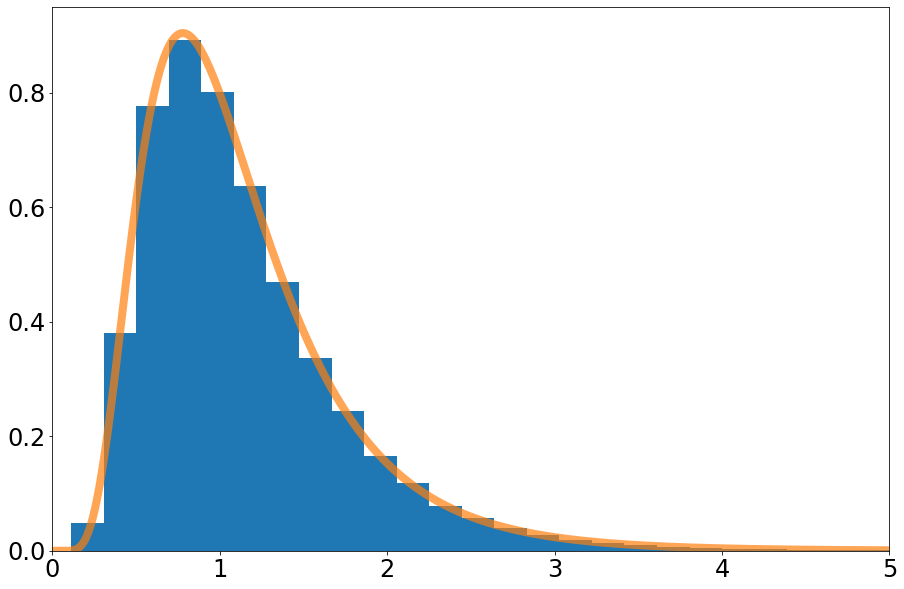

In [17]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.lognorm.pdf(x, s),linewidth = 8,alpha = 0.7)
plt.show()

Out of curiosity, I tested to see what a chi squared distribution looks like.

In [18]:
d = stats.chi2.rvs(df=50, size=100000)

In [19]:
d

array([58.10408397, 40.25110481, 65.95232583, ..., 46.4626442 ,
       50.99537057, 39.00248679])

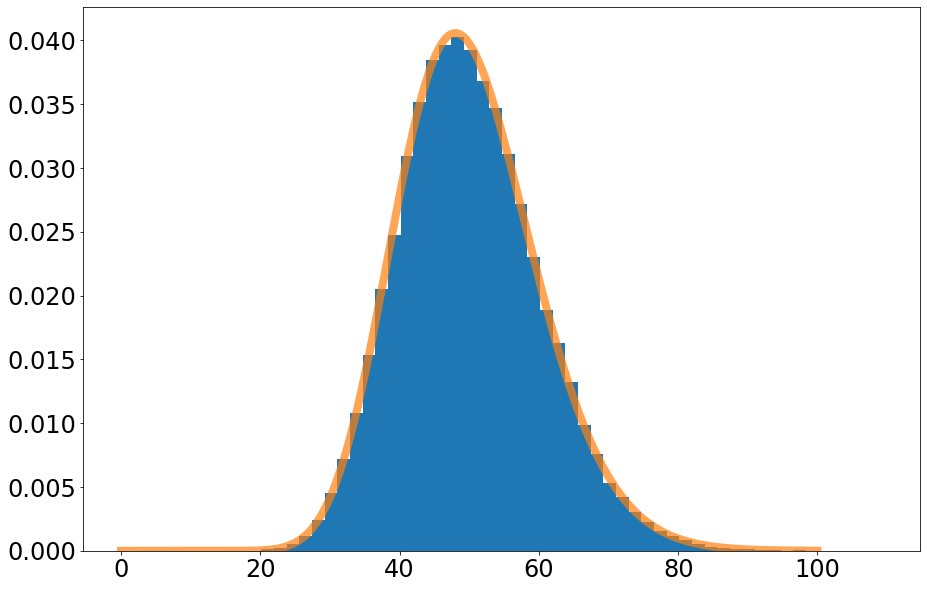

In [20]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
#plt.xlim([0,20])
x = np.linspace(0,100,1000)
ax.plot(x, stats.chi2.pdf(x, df=50),linewidth = 8,alpha = 0.7)
plt.show()

## 3.

**Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'**

## A)

**Select a value for your hypothetical measurement**

I will be using and referring to the LogNormal plot from above, but will redeclare the distribution below so it is contained inside Problem 3.
I select the value 2.5

## B)

**Clearly state the statistical question you want to ask in words**

Stating the statistical question in mind (to determine 'sigma'):
What is the value of sigma corresponding to the probability integrated from a Normal distribution that would equal the probability of measuring the value 2.5 in a LogNormal distribution?

What is the value of sigma that corresponds to the area under the curve (the integrated probability) of a Normal distribution that equals the area under the curve of a LogNormal distribution that is integrated from the center to the value 2.5?

Basic question:
What is the probability that detecting the value 2.5 is caused by noise in the experimental signal?

## C)

**Convert your word question into a mathematical integral**

## D)

**Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. .cdf() and .ppf() in scipy).**

## E)

**Convert your probability into an equivalent 'sigma'**

## 4.

**Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.**

## Non-Continuous Distributions

## 1.

In [21]:
mu = 5
d = stats.poisson.rvs(mu)

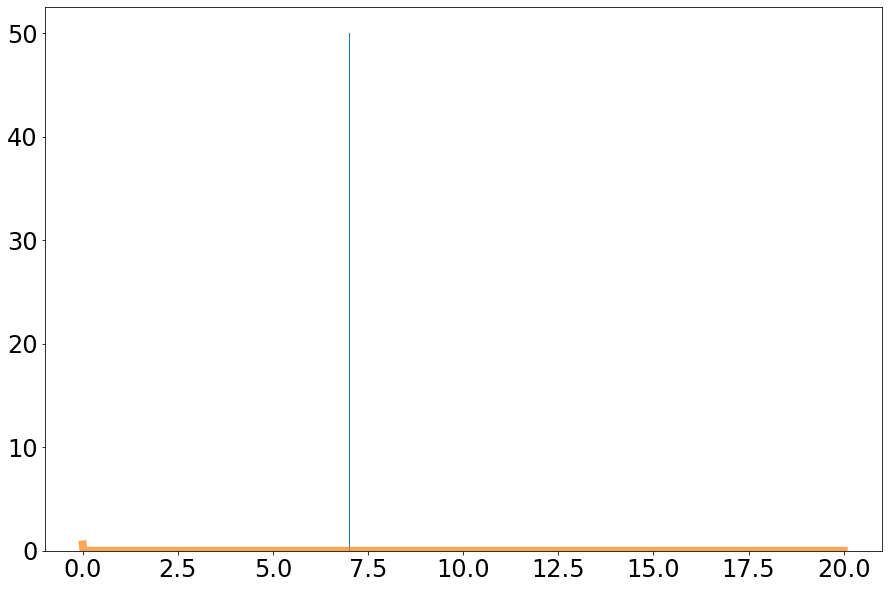

In [22]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
#plt.xlim([0,20])
x = np.linspace(0,20,1000)
ax.plot(x,stats.poisson.pmf(x, s),linewidth = 8,alpha = 0.7)
plt.show()